# Das Stahlband
### Aufgabenstellung

Ein Stahlband der Länge $l$, der Breite $b$ und der Dicke $d$ wird um $\Delta l$ elastisch gedehnt. Das Elastitzitätsmodul des Materials ist $E$, das Schubmodul $G$. Berechnen Sie

1. die für diese Dehnung erforderliche Kraft $F$ und
2. die dabei auftrentende Querkontraktion $\Delta b$

### Gegeben
- Länge $l = 1000~mm$
- $\Delta l = 1,0~mm$
- Breite $b = 20~mm$
- Dicke $d = 0,20~mm$
- Elastitzitätsmodul $E = 210~GPa$
- Schubmodul $G = 83~GPa$

### Gesucht 
- Kraft $F$
- Querkontraktion $\Delta b$

### Skizze

![title](Skizzen/Stahlband.png)


### Physikalischer Lösungsweg
##### Aufgabe 1 

benötigte Formeln:
- Spannung $ \sigma = \frac{F_N}{A}$
- Dehnung des Stabes $\epsilon = \frac{\Delta l}{l}$
- Elastizitätsmodul $E$ mit $\sigma = E \cdot \epsilon$

Durch Einsetzen und Umstellen ergibt sich:\
$F = E \cdot A \cdot \frac{\Delta l}{l} = b \cdot d \cdot E \cdot \frac{\Delta l}{l}$

Berechnung $F$:\
$F = 20~mm \cdot 0,20~mm \cdot 210~GPa \cdot \frac{1,0~mm}{1000~mm} = 0,84~GPa = 840~\frac{N}{mm²} = 84~kg$


##### Aufgabe 2
benötigte Formeln:
- Querkontraktion $\Delta b = \mu \frac{\Delta l}{l} \cdot b$\
mit der Poisson-Zahl $\mu = \frac{E}{2G} - 1$

Berechnung $\Delta b$:\
$\Delta b = \frac{210~GPa}{2 \cdot 83~GPa} - 1 \cdot \frac{1,0~mm}{1000~mm} \cdot 20~mm = 0,0053~mm = 5,3~\mu m$



### Implementierung in Python
Die oben dargestellten Abhängigkeiten können nun in der Programmiersprache Python beschrieben und anschließend graphisch dargestellt werden. Daher müssen zuerst einige Bibliotheken importiert werden, die für Berechnungen und Visualisierungen notwendig sind.

In [22]:
import numpy as np
import pandas as pd
from pandas import *
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

Nun werden die gegebenen Werte als Variablen und anschließend die Funktionen definiert. Mit diesen können Kraft und QUerkontraktion berechnet werden.

In [14]:
# Definieren der Variablen
l = 1000 # Länge [mm]
dl = 1.0 # Längendehnung [mm]
b = 20 # Breite [mm]
d = 0.20 # Dicke [mm]
e_modul = 210 # Elastitzitätsmodul [GPa]
g_schub = 83 # Schubmodul [GPa]

In [32]:
# Funktion zur Berechnung von Fn
def berechne_F(b, d, e_modul, dl, l):
    f = b * d * e_modul * (dl/l)
    return f

# Funktion zur Berechnung von delta_b
def berechne_delta_b(e_modul, g_schub, dl, l, b):
    mu = (e_modul/(2*g_schub)) - 1
    delta_b = mu * (dl/l) * b
    return delta_b

# Verwendung der Funktion
fn = berechne_F(b, d, e_modul, dl, l)
delta_b = berechne_delta_b(e_modul, g_schub, dl, l, b)
print(f"Die Kraft F beträgt {round(fn, 2)} GPa und die Querkontraktion beträgt {round(delta_b, 4)} mm")

Die Kraft F beträgt 0.84 GPa und die Querkontraktion beträgt 0.0053 mm


### Graphische Darstellung unter Variation der Anfangsbedingung

Nun kann sowohl die Dicke des Materials als auch seine Breite verändert werden. Für diese neuen Werte sollen ebenfalls die Kraft und Querkontraktion berechnet werden. Hierzu wird in einem ersten Schritt eine Tabelle erstellt, welche den Materialnamen, das Elastizitätsmodul und das Schubmodul beinhaltet. Anschließend werden zwei Vektoren erstellen mit unterschiedlichen Materialdicken und -breiten, um für jeden einzelnen Wert in diesen Vektoren die Kraft und Querkontraktion zu berechnen. 
Für die Berechnung der Kraft bei variierenden Materialdicken wird davon ausgegangen, dass sich die Materialbreite selbst nicht verändert und eine Breite von 20 mm besitzt. Auch bleiben die Länge des Bandes und die Längendilatation wie gegeben. 

In [39]:
tabelle = {"Material": ["Stahl"],
          "Elastizitätsmodul [GPa]": [210],
          "Schubmodul [GPa]": [83]}

dicken = np.arange(0.20, 1.3, 0.1)
breiten = np.arange(20, 130, 10)

# Erstellen einer leere Liste
werteListe = []
# Berechnung von Kraft und Querkontraktion
for d_i, b_i in zip(dicken, breiten):
    for e_modul, g_schub in zip(tabelle['Elastizitätsmodul [GPa]'], tabelle['Schubmodul [GPa]']):
        f = berechne_F(b, d_i, e_modul, dl, l)
        delta_b = berechne_delta_b(e_modul, g_schub, dl, l, b_i)
        werteListe.append([e_modul, g_schub, d_i, f, b_i, delta_b])

tabelle = pd.DataFrame(werteListe, columns=['Elastizitätsmodul [GPa]', 'Schubmodul [GPa]', 'Materialdicke [mm]','Kraft [GPa]', 'Materialbreite [mm]', 'Querkontraktion delta b [mm]'])
tabelle.head()

,Elastizitätsmodul [GPa],Schubmodul [GPa],Materialdicke [mm],Kraft [GPa],Materialbreite [mm],Querkontraktion delta b [mm]
0,210,83,0.2,0.84,20,0.005301
1,210,83,0.3,1.26,30,0.007952
2,210,83,0.4,1.68,40,0.010602
3,210,83,0.5,2.10,50,0.013253
4,210,83,0.6,2.52,60,0.015904


Mithilfe dieser Tabelle, welche die ausgerechneten Werte enthält, können nun zwei Plots erstellt werden. In einem ersten Plot soll visualisiert werden, welche Auswirkung die Materialdicke auf die aufzuwendende Kraft für eine Dehnung um 1.0 mm hat. In einem zweiten Plot soll dargestellt werden, wie sich die Materialbreite auf die Querkontraktion auswirkt.
Hierfür werden sowohl die Messpunkte als auch die Funktionen geplottet. 

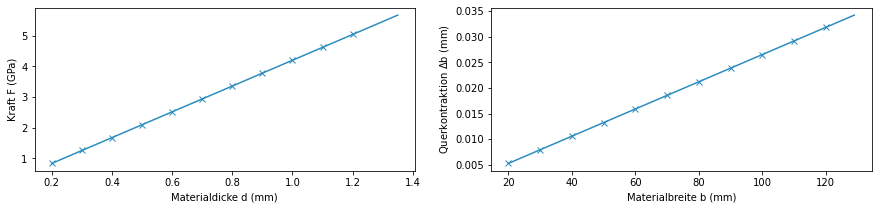

In [17]:
# Definieren des Aussehens der Plots
fig, axs = plt.subplots(1, 2, figsize=(15,3))
# Zeichnen der Verläufe
# 1. Plots
axs[0].plot(tabelle['Materialdicke [mm]'], tabelle['Kraft [GPa]'], 'x', color='#2b8cbe')
axs[0].plot(np.arange(0.20, 1.40, 0.05), berechne_F(b, np.arange(0.20, 1.40, 0.05), e_modul, dl, l), '-', color='#2b8cbe')

# 2. Plots
axs[1].plot(tabelle['Materialbreite [mm]'], tabelle['Querkontraktion delta b [mm]'], 'x', color='#2b8cbe')
axs[1].plot(np.arange(20, 130, 1), berechne_delta_b(e_modul, g_schub, dl, l, np.arange(20, 130, 1)), '-', color='#2b8cbe')

# Achsenbeschriftung und -begrenzung des 1. Plots
axs[0].set_ylabel(r"Kraft F (GPa)")
axs[0].set_xlabel(r"Materialdicke d (mm)")
# Achsenbeschriftung und -begrenzung des 2. Plots
axs[1].set_ylabel(r"Querkontraktion $\mathit{\Delta}$b (mm)")
axs[1].set_xlabel(r"Materialbreite b (mm)")
# Anzeige des gesamten Plots
plt.show()

### Vergleich zwischen verschiedenen Materialbändern

Nun kann ebenso die Kraft und die Querkontraktion für verschiedene Materialbänder berechnet werden. Hierbei sollen die ebengenannten Werte zusätzlich zu Stahl für Wolfram, Titan, Aluminium, Blei und Gummi berechnet werden. Die Elastizitätmodule und Schubmodule sind dementsprechend:

Material | Elastizitätsmodul [GPa] | Schubmodul [GPa]
--- | :-: | :-: 
Wolfram | 405 | 158
Stahl | 210 | 83
Titan | 110 | 41.4 
Aluminium | 70 | 25.5 
Blei | 19 | 6 
Gummi | 5 | 0.0003 


Glücklicherweise ist für alle jene Materialien eine csv-Datei vorhanden, in welcher unterschiedliche Materialdicken und -breiten der Bänder schon erfasst wurden. Diese Datei soll nun eingelesen und die Kräfte sowie Querkontraktionen berechnet werden. Hierbei besitzen alle Bänder dieselbe Länge und wurden ebenso alle um 1.0 mm gedehnt. 

In [18]:
# Einlesen der csv-Datei mit allen Messdaten
material_messungen = pd.read_csv("mats.csv", sep = ';')
material_messungen.head()

,Material,Elastizitätsmodul [GPa],Schubmodul [GPa],Dicke,Breite
0,Wolfram,405,158.0,0.2,20
1,Wolfram,405,158.0,0.2,30
2,Wolfram,405,158.0,0.2,40
3,Wolfram,405,158.0,0.2,50
4,Wolfram,405,158.0,0.2,60


In [19]:
# Definition der Startparameter
l = 1000 # Länge [mm]
dl = 1.0 # Längendehnung [mm]

# Erstellen einer leeren Liste
werte = []
# Berechnung von Kraft und Querkontraktion
for index, row in material_messungen.iterrows():
    f = berechne_F(material_messungen.iloc[index, 4], material_messungen.iloc[index, 3], material_messungen.iloc[index, 1], dl, l)
    delta_b = berechne_delta_b(material_messungen.iloc[index, 1], material_messungen.iloc[index, 2], dl, l, material_messungen.iloc[index, 4])
    werte.append([f, delta_b])
    
# Liste in Dataframe umwandeln und mit der ersten Tabelle zusammenführen
tab = pd.DataFrame(werte, columns=['Kraft [GPa]', 'Delta b [mm]'])
material_berechnungen = pd.concat([material_messungen, tab], axis=1)
# Abspeichern als csv
material_berechnungen.to_csv('mats_calc.csv', index=False, header=True)
material_berechnungen.head()

,Material,Elastizitätsmodul [GPa],Schubmodul [GPa],Dicke,Breite,Kraft [GPa],Delta b [mm]
0,Wolfram,405,158.0,0.2,20,1.62,0.005633
1,Wolfram,405,158.0,0.2,30,2.43,0.008449
2,Wolfram,405,158.0,0.2,40,3.24,0.011266
3,Wolfram,405,158.0,0.2,50,4.05,0.014082
4,Wolfram,405,158.0,0.2,60,4.86,0.016899


Nachdem nun die errechneten Werte dem Dataframe angefügt wurden, soll nun ein Teil der Daten visualisiert werden. Hierbei sollen nun die Kräfte für nur jene Materialbänder dargestellt werden, welche eine Breite von 20 mm besitzen, aber in ihrer Dicke variieren. Die Erstellung eines neuen Dataframes, welches nur diese Daten beinhaltet, erleichtert die Handhabung der Daten.

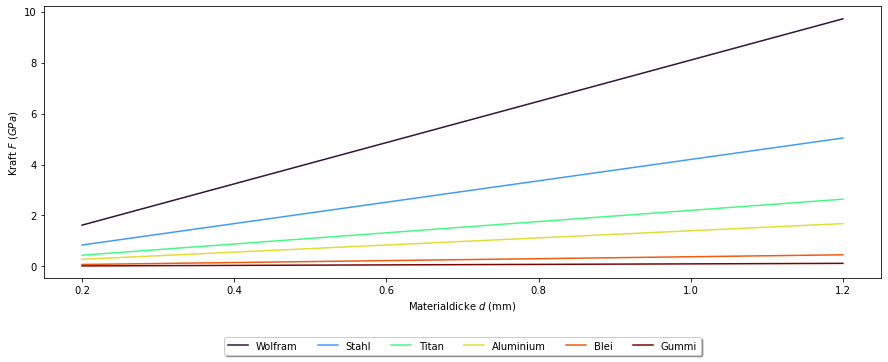

In [20]:
# Erstellen des Teil-Dataframes, was nur jene Zeilen beinhaltet, in denen die Breite = 20 mm ist
zwanzigerBreite = material_berechnungen[material_berechnungen['Breite'] == 20]

# Für die Visualsierung werden nun die verschiedenen Messungen nach den unterschiedlichen Materialien gruppiert
groups = zwanzigerBreite.groupby('Material', sort = False) 
# Definition einer Farbpalette (https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html)
col_pal = plt.get_cmap('turbo', len(material_berechnungen['Material'].unique()))
# Initialisieren einer Zählvariable
i = -1

# Definieren der Größe und des Aussehens des Plots
plt.figure(num=None, figsize=(15,5), facecolor='w', edgecolor='k')
# Iteration der Material-Gruppen und anschließende Visualsierung
for name, group in groups:
    i = i+1
    plt.plot(group['Dicke'], group['Kraft [GPa]'], color=col_pal(i), label = f"{name}")
    
# Achsenbeschriftung und -begrenzung des 1. Plots
plt.xlabel(r"Materialdicke $\mathit{d}$ (mm)")
plt.ylabel(r"Kraft $\mathit{F}$ ($GPa$)")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=len(material_berechnungen['Material'].unique()))

# Anzeige des gesamten Plots
plt.show()

Hierbei wird ersichtlich, dass für Wolfram mehr Kraft ausgewendet werden muss, als für Stahl, um das Material in seiner Länge zu dehnen. Für Gummi, mit dem niedrigsten Elastizitäts- und Schubmodul, muss egal bei welcher Materialdicke die geringste Kraft aufgewendet werden, um es um 1.0 mm zu dehnen. 

Nun soll zuletzt für jedes Material ein Plot erstellt werden, in welchen für unterschiedliche Materialbreiten die Querkontraktionen $\Delta$b aufgezeigt werden.

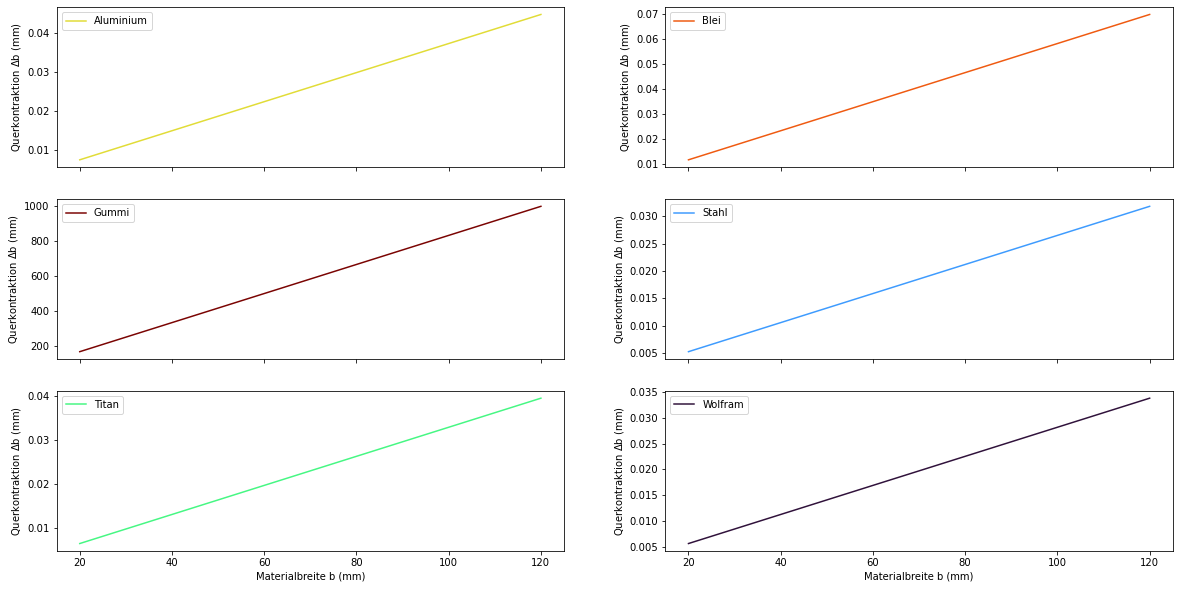

In [30]:
# Erstellen einer Farbpalette
cols_material = ListedColormap(sns.color_palette(['#E1DC37', '#EF5A11', '#7A0402', '#3E9BFE', '#46F783', '#30123B']))
# Verwendung der Pivot Table anstatt der groupby-Funktion und anschließende Visualisierung
fig = pd.pivot_table(data=material_berechnungen, # Daten
                     index='Breite',             # x-Achse
                     columns='Material',         # Legenden
                     values='Delta b [mm]'       # y-Achse
                     ).plot(subplots=True,       # plot-Funktion
                            layout=(3,2),        # 6 Plots in 3 Reihen und 2 Spalten verteilen
                            figsize=(20,10),     # Plotgröße
                            cmap=cols_material,  # Farben
                            ylabel=r'Querkontraktion $\mathit{\Delta}$b (mm)', # y-Achsenbeschriftung
                            xlabel='Materialbreite b (mm)')                    # x-Achsenbeschriftung